In [1]:
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline
from time import time
import logging
from sklearn.cross_validation import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from PIL import Image

# Importing the Labeled Faces in the Wild dataset 

In [72]:
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=2, slice_=(slice(83, 195, None), slice(83, 195, None)))

In [73]:
for name in lfw_people.target_names:
    print(name)


Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Tony Blair


# Preprocessing

In [74]:
x1 = np.expand_dims(lfw_people.images, axis=-1)

In [75]:
x1.shape

(1140, 224, 224, 1)

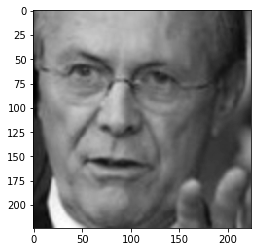

In [31]:
plt.imshow(lfw_people.images[2], cmap='gray')

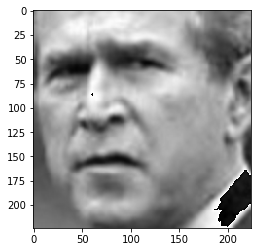

In [92]:
plt.imshow(x_test[2])

In [78]:
x = np.repeat(x1, 3, axis=-1)

In [79]:
x.shape

(1140, 224, 224, 3)

In [80]:
y = lfw_people.target

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [91]:
img_rows, img_cols = 224, 224
num_classes = 5
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 224
x_test /= 224
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (912, 224, 224, 3)
912 train samples
228 test samples


In [93]:
from tensorflow.python.keras._impl.keras import backend as K
from tensorflow.python.keras._impl.keras.applications.imagenet_utils import _obtain_input_shape
from tensorflow.python.keras._impl.keras.applications.imagenet_utils import decode_predictions
from tensorflow.python.keras._impl.keras.applications.imagenet_utils import preprocess_input
from tensorflow.python.keras._impl.keras.layers import Conv2D
from tensorflow.python.keras._impl.keras.layers import Dense
from tensorflow.python.keras._impl.keras.layers import Flatten
from tensorflow.python.keras._impl.keras.layers import GlobalAveragePooling2D
from tensorflow.python.keras._impl.keras.layers import ZeroPadding2D
from tensorflow.python.keras._impl.keras.layers import GlobalMaxPooling2D
from tensorflow.python.keras._impl.keras.layers import Input
from tensorflow.python.keras._impl.keras.layers import MaxPooling2D
from tensorflow.python.keras._impl.keras.models import Model
from tensorflow.python.keras._impl.keras.utils import layer_utils
from tensorflow.python.keras._impl.keras.utils.data_utils import get_file
from tensorflow.python.platform import tf_logging as logging
from tensorflow.python.util.tf_export import tf_export

# Training the Network

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (224, 224, 3)
batch_size = 10
num_classes = 5
epochs = 3
model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(5, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)       295168    
__________

In [95]:
from keras import optimizers
from keras.metrics import categorical_accuracy

sgd = keras.optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['categorical_accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 912 samples, validate on 228 samples
Epoch 1/3
912/912 [==============================] - 1479s 2s/step - loss: 1.4930 - categorical_accuracy: 0.4638 - val_loss: 1.4258 - val_categorical_accuracy: 0.4561
Epoch 2/3
912/912 [==============================] - 1439s 2s/step - loss: 1.4103 - categorical_accuracy: 0.4671 - val_loss: 1.4214 - val_categorical_accuracy: 0.4561
Epoch 3/3
912/912 [==============================] - 1454s 2s/step - loss: 1.4091 - categorical_accuracy: 0.4671 - val_loss: 1.4647 - val_categorical_accuracy: 0.4561
Test loss: 1.4646508568211605
Test accuracy: 0.45614035087719296


# Saving the model weights 

In [120]:
modela = model.save_weights("model.h5") 
print("saved model to disk")

saved model to disk


In [121]:
modela1 = model.save("face_model.h5")

In [122]:
from IPython.display import Image

In [140]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input

# Predicting New Images with the Neural Network

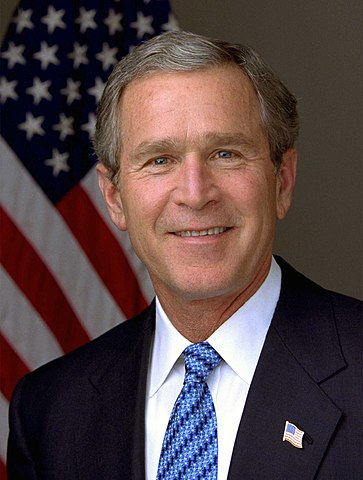

In [170]:
Image(filename="Desktop/img/gwb.jpeg", width=224, height = 224)

In [135]:
img = Image(filename="Desktop/img/gwb.jpeg", width=224, height = 224)

In [142]:
img_path = "Desktop/img/gwb.jpeg"

In [143]:
img = image.load_img(img_path, target_size=(224, 224))

In [152]:
x1 = image.img_to_array(img)
x = np.expand_dims(x1, axis=0)
x2 = preprocess_input(x)
x2.shape

(1, 224, 224, 3)

In [168]:
yhat = model.predict(x2)

In [169]:
yhat

array([[1.3757020e-11, 3.1898305e-18, 1.0000000e+00, 1.2275255e-18,
        1.9251621e-15]], dtype=float32)

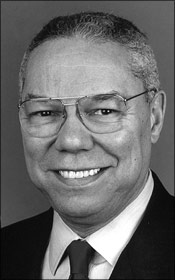

In [177]:
Image(filename="Desktop/img/cp.jpeg", width=224, height = 224)

In [183]:
img_path2 = "Desktop/img/cp.jpeg"
img2 = image.load_img(img_path2, target_size=(224, 224))
i = image.img_to_array(img2)
j = np.expand_dims(i, axis=0)
x5 = preprocess_input(j)
x5.shape

(1, 224, 224, 3)

In [184]:
yhat = model.predict(x5)
yhat

array([[5.0392234e-12, 2.6921268e-19, 1.0000000e+00, 4.9683401e-20,
        3.0435516e-16]], dtype=float32)

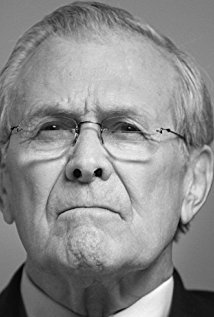

In [185]:
Image(filename="Desktop/img/dr.jpeg", width=224, height = 224)

In [186]:
img_path3 = "Desktop/img/dr.jpeg"
img3 = image.load_img(img_path3, target_size=(224, 224))
t = image.img_to_array(img3)
u = np.expand_dims(t, axis=0)
x11 = preprocess_input(u)
x11.shape

(1, 224, 224, 3)

In [187]:
yhat = model.predict(x11)
yhat

array([[3.4356290e-14, 1.4844128e-23, 1.0000000e+00, 2.3993128e-24,
        9.2226451e-20]], dtype=float32)